###  Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load and Inspect the Dataset

In [3]:
dataset_path = "dataset_2.csv"
dataset_2 = pd.read_csv(dataset_path)

In [4]:
# Display dataset information
print("Dataset Information:")
print(dataset_2.info())
print("\nFirst Few Rows of the Dataset:")
print(dataset_2.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  feature_11  1000 non-null   float64
 11  feature_12  1000 non-null   float64
 12  feature_13  1000 non-null   float64
 13  target      1000 non-null   object 
dtypes: float64(13), object(1)
memory usage: 109.5+ KB
None

First Few Rows of the Dataset:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.528289  -1.906875  -0.984634  -0.861688  -1.4211

In [5]:
# Drop the target column (if it exists) and focus on features for clustering
features = dataset_2.drop(columns=["target"], errors="ignore")
numeric_features = features.select_dtypes(include=[np.number])  # Select only numeric features

### Step 2: Data Preprocessing

In [6]:
# Scale the data to normalize feature magnitudes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

### Step 3: K-Means Clustering


In [7]:
# Test different values of K (2 to 10) for clustering
k_values = range(2, 11)
kmeans_silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    kmeans_silhouette_scores.append(silhouette_avg)

# Determine the best K for K-Means based on silhouette scores
best_k_kmeans = k_values[np.argmax(kmeans_silhouette_scores)]
print(f"Best K for K-Means: {best_k_kmeans}")

Best K for K-Means: 2


F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

### Step 4: Gaussian Mixture Models (GMM)

In [8]:

# Test different values of K (2 to 10) for clustering
gmm_silhouette_scores = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, gmm_labels)
    gmm_silhouette_scores.append(silhouette_avg)

# Determine the best K for GMM based on silhouette scores
best_k_gmm = k_values[np.argmax(gmm_silhouette_scores)]
print(f"Best K for GMM: {best_k_gmm}")

F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Best K for GMM: 2


###  Step 5: Visualizing Silhouette Scores


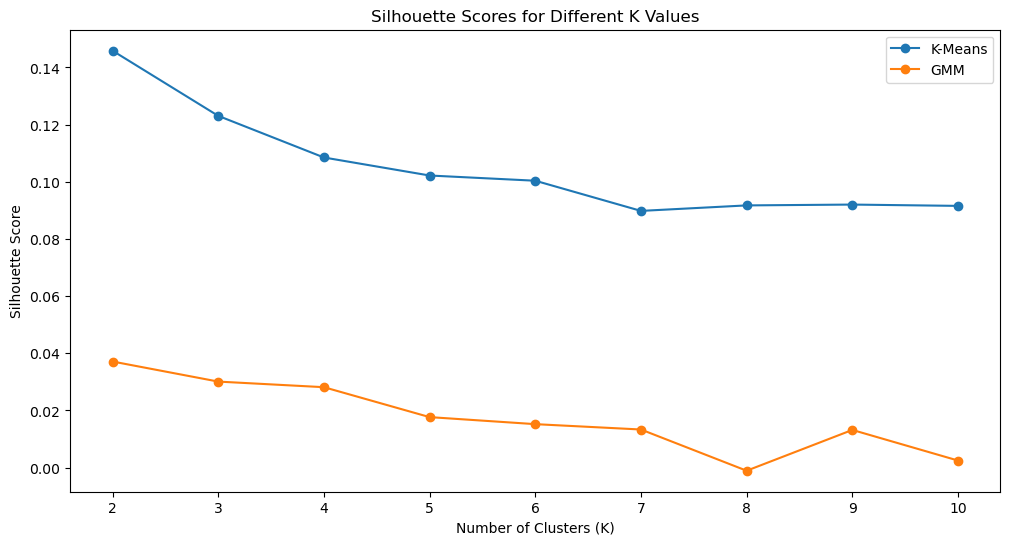

In [9]:
# Plot silhouette scores for both K-Means and GMM
plt.figure(figsize=(12, 6))
plt.plot(k_values, kmeans_silhouette_scores, marker="o", label="K-Means")
plt.plot(k_values, gmm_silhouette_scores, marker="o", label="GMM")
plt.xticks(k_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different K Values")
plt.legend()
plt.show()

In [10]:
# ## Step 6: Assigning Clusters Using Best K
# K-Means clustering with the best K
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=42)
dataset_2["KMeans_Cluster"] = kmeans.fit_predict(scaled_features)


F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [11]:
# GMM clustering with the best K
gmm = GaussianMixture(n_components=best_k_gmm, random_state=42)
dataset_2["GMM_Cluster"] = gmm.fit_predict(scaled_features)

F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Step 7: Visualizing Clusters


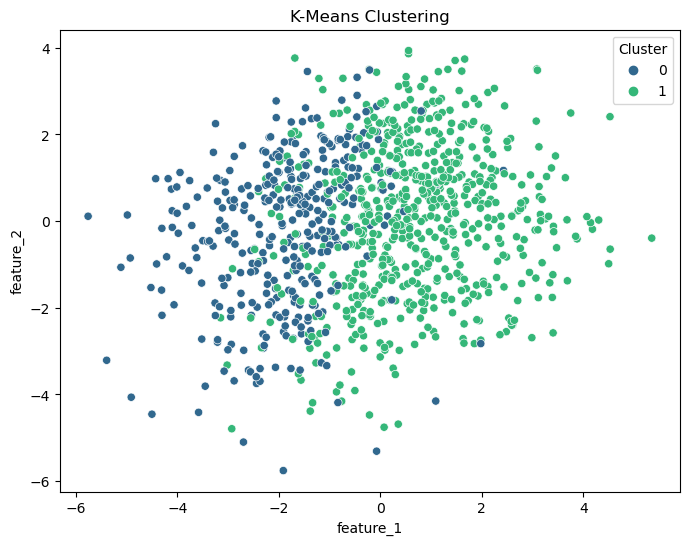

In [12]:
# Visualize K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=numeric_features.columns[0],
    y=numeric_features.columns[1],
    hue=dataset_2["KMeans_Cluster"],
    palette="viridis",
    data=dataset_2
)
plt.title("K-Means Clustering")
plt.xlabel(numeric_features.columns[0])
plt.ylabel(numeric_features.columns[1])
plt.legend(title="Cluster")
plt.show()

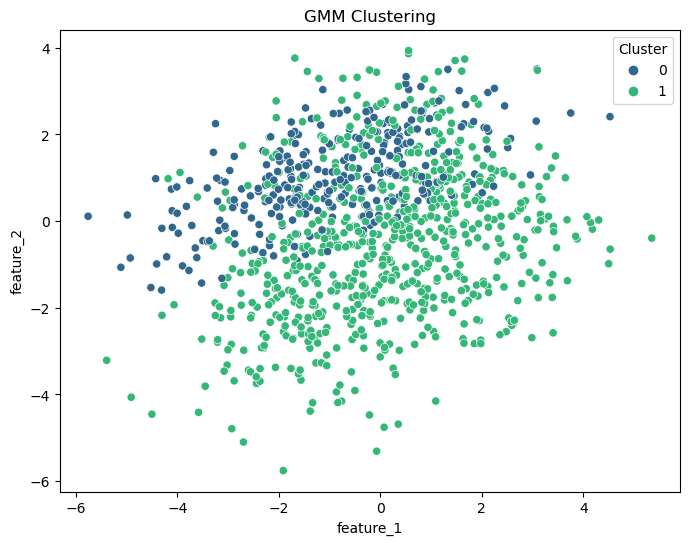

In [13]:
# Visualize GMM clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=numeric_features.columns[0],
    y=numeric_features.columns[1],
    hue=dataset_2["GMM_Cluster"],
    palette="viridis",
    data=dataset_2
)
plt.title("GMM Clustering")
plt.xlabel(numeric_features.columns[0])
plt.ylabel(numeric_features.columns[1])
plt.legend(title="Cluster")
plt.show()

In [14]:
# Display the dataset with cluster assignments
print("\nCluster Assignments (K-Means and GMM):")
print(dataset_2.head())


Cluster Assignments (K-Means and GMM):
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.528289  -1.906875  -0.984634  -0.861688  -1.421155  -3.186939   
1  -2.244724  -1.666721  -0.107445   0.492816  -2.974090  -3.771330   
2  -1.536177   2.289151   0.615967   0.567218  -3.175342   0.374360   
3  -1.721592   1.958004  -1.439608   1.663423  -2.811585   1.215486   
4   0.328438   2.621469   0.504271  -0.184809  -1.573178   0.184845   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0   0.417095  -4.517827  -0.014800   -1.854312    1.983704    0.757177   
1   0.562911   1.645834  -2.279628    1.497782   -0.858216   -0.546264   
2  -1.829682   0.307250  -0.252401   -1.605891    0.129368   -2.380739   
3   0.478038   3.191214  -1.624402   -0.571969   -0.222575   -1.681969   
4  -0.365677  -0.103626  -0.078603    0.016333    0.330114   -0.814011   

   feature_13 target  KMeans_Cluster  GMM_Cluster  
0   -0.215224  alpha               1